In [1]:
import sys

sys.path.append('..')

import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

from defences.baard import (ApplicabilityStage, DecidabilityStage,
                            ReliabilityStage)

In [9]:
# Create mesh
xx, yy = np.meshgrid(
    np.arange(-0.1, 1.1, 0.01), 
    np.arange(-0.1, 1.1, 0.01))
X_mesh = np.c_[xx.ravel(), yy.ravel()]
print(X_mesh.shape)

(14641, 2)


In [11]:
def run_stage(Stage, X, y, pred):
    s = Stage(n_classes=2, fpr=0., verbose=False)
    s.fit(X, y)
    s.search_thresholds(X, y, np.zeros_like(y))

    output = s.predict(X_mesh, pred)

    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plt.contourf(xx, yy, output.reshape(xx.shape), cmap='coolwarm', alpha=0.6)
    plt.show()

In [12]:
def run_baard(file_name):
    df = pd.read_csv(file_name, header=None)
    data = df.to_numpy()
    X = data[:,:2]
    y = data[:,2].astype(np.int)

    model = SVC(C=10000)
    model.fit(X, y)
    pred = model.predict(X_mesh)

    # Decision boundary of SVM
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plt.contourf(xx, yy, pred.reshape(xx.shape), cmap='coolwarm', alpha=0.6)
    plt.show()

    run_stage(ApplicabilityStage, X, y, pred)
    run_stage(ReliabilityStage, X, y, pred)
    run_stage(DecidabilityStage, X, y, pred)

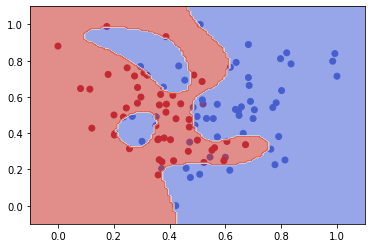

[BAARD] s1 self.fpr: 0.0
[BAARD] s1 eval. fpr (only thresholds): 0.0
[BAARD] s1 tolerance: [0 0]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0


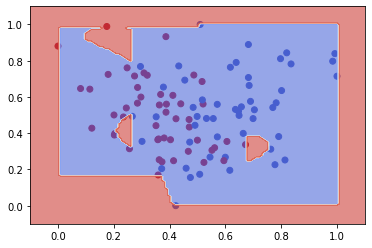

[BAARD] s2 eval. fpr: 0.0


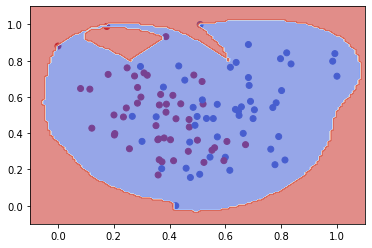

[BAARD] s3 eval. fpr: 0.0


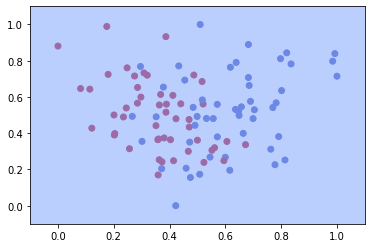

In [13]:
run_baard('d1.csv')

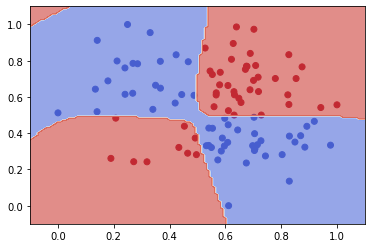

[BAARD] s1 self.fpr: 0.0
[BAARD] s1 eval. fpr (only thresholds): 0.0
[BAARD] s1 tolerance: [0 0]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0


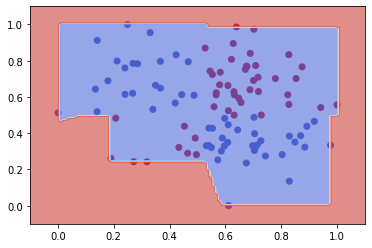

[BAARD] s2 eval. fpr: 0.0


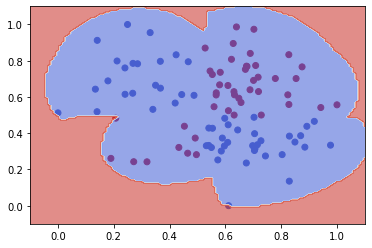

[BAARD] s3 eval. fpr: 0.0


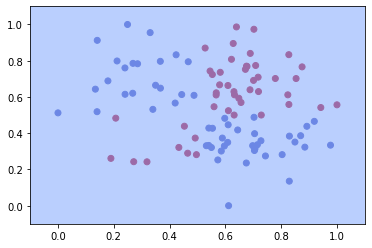

In [14]:
run_baard('d2.csv')

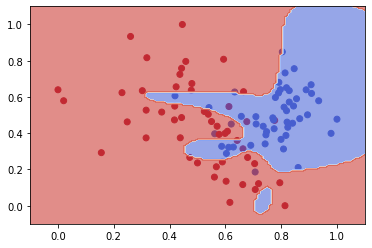

[BAARD] s1 self.fpr: 0.0
[BAARD] s1 eval. fpr (only thresholds): 0.0
[BAARD] s1 tolerance: [0 0]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0


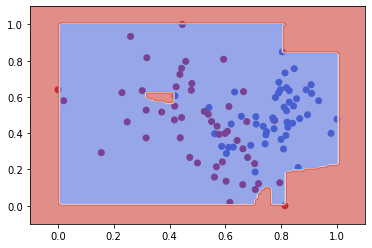

[BAARD] s2 eval. fpr: 0.0


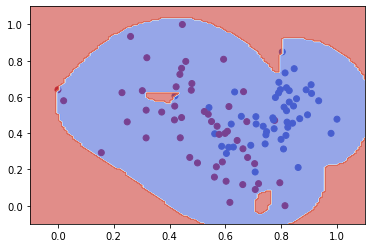

[BAARD] s3 eval. fpr: 0.0


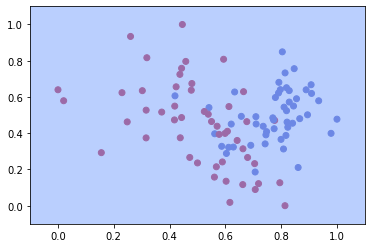

In [15]:
run_baard('d3.csv')

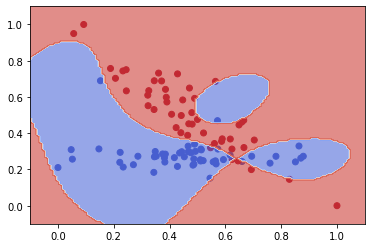

[BAARD] s1 self.fpr: 0.0
[BAARD] s1 eval. fpr (only thresholds): 0.0
[BAARD] s1 tolerance: [0 0]
[BAARD] s1 eval. fpr (thresholds + tolerance): 0.0


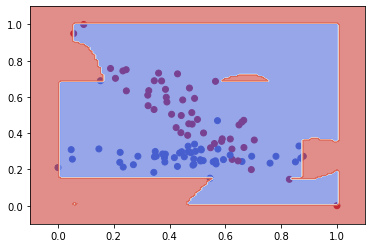

[BAARD] s2 eval. fpr: 0.0


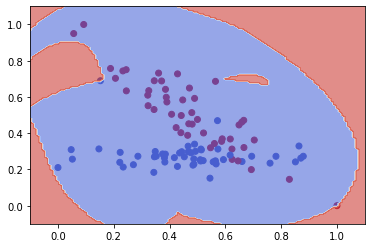

[BAARD] s3 eval. fpr: 0.0


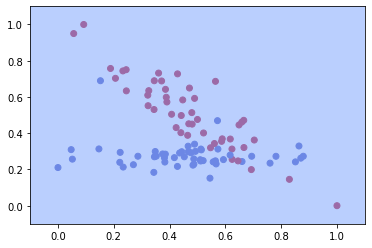

In [16]:
run_baard('d4.csv')